# 데이터 전처리

## 최종 코드

### 특수문자, 기호, 한글 초성 제거

In [107]:
# Setting

import pandas as pd
import re



def text_preprocessing(df_reviews):
    """Review_Text의 리뷰글을 전처리 하는 함수"""
    for i in range(len(df_reviews)):
        text = df_reviews['Review_Text'][i]
    
        if not isinstance(text, str):
            text = str(text)
        temp = re.sub('[^가-힣a-zA-Z0-9\s]', '',text)

        df_reviews.loc[[i],['Review_Text']] = temp
        
    df_reviews['Review_Text'] = df_reviews['Review_Text'].str.replace('\n','')
    df_reviews = df_reviews.drop('Unnamed: 0', axis = 1)
    # df_reviews['Review_Text'] = df_reviews['Review_Text'].str.replace('nan', '')
    df_reviews.drop(df_reviews[df_reviews['Review_Text'] == 'nan'].index, inplace=True)
    df_reviews.drop(df_reviews[df_reviews['Review_Text'] == ''].index, inplace=True)
    df_reviews.to_csv('./S_hotel_buffet_review_data_preprocess.csv')
    
    return df_reviews

In [108]:
# 실행
shilla_hotel_buffet_review = pd.read_csv("C:/Users/pps/Desktop/Restaurant_Review/Data_Collect/shilla_hotel_buffet_review_original.csv", encoding='utf-8')

S_hotel_buffet_preprocess_review = text_preprocessing(shilla_hotel_buffet_review)

### 맞춤법 확인

In [109]:
# Setting
from hanspell import spell_checker

requestURL = "https://m.search.naver.com/p/csearch/ocontent/util/SpellerProxy?passportKey=90ae3cbdae22968de3f12b9095f35ea488ecf40b&_callback=jQuery112406350187405022272_1718946457167&q=%EB%A7%9E%EC%B6%A4%EB%B2%95+%EA%B2%80%EC%82%AC%EB%A5%BC+%EC%9B%90%ED%95%98%EB%8A%94+%EB%8B%A8%EC%96%B4%EB%82%98+%EB%AC%B8%EC%9E%A5%EC%9D%84+%EC%9E%85%EB%A0%A5%ED%95%B4+%EC%A3%BC%EC%84%B8%EC%9A%94.&where=nexearch&color_blindness=0&_=1718946457168"

def ReviewSpellChecker(df_reviews):
    """Review_Text의 맞춤법 고치는 함수"""
    for i in range(len(df_reviews)):
        sentence = df_reviews['Review_Text'][i]
        if len(sentence) > 0:
            result = spell_checker.check(df_reviews['Review_Text'][i], requestURL).checked
        else:
            result = ""
        df_reviews.loc[i, 'Review_Text'] = result
        
    df_reviews = df_reviews.drop('Unnamed: 0', axis = 1)
    df_reviews.to_csv('./S_hotel_buffet_review_spellchecker.csv')
    return df_reviews

In [110]:
# 실행

buffet_preprocess_review = pd.read_csv("C:/Users/pps/Desktop/Restaurant_Review/Data_Preprocessing/S_hotel_buffet_review_data_preprocess.csv")
buffet_spellchecker_review = ReviewSpellChecker(buffet_preprocess_review)

### spacing 확인

In [225]:
# Setting
from pykospacing import Spacing
spacing = Spacing()

def checkSpacing(df_reviews):
    """Review_Text의 띄어쓰기 오류 고치는 함수"""
    for i in range(len(df_reviews)):
        print(i, df_reviews["Review_Text"][i])
        test_space = spacing(df_reviews["Review_Text"][i])
        df_reviews.loc[i, 'Review_Text'] = test_space
    df_reviews = df_reviews.drop('Unnamed: 0', axis = 1)
    df_reviews.to_csv('./S_hotel_buffet_review_spacingcheck.csv')
    return df_reviews

In [ ]:
# 실행

spellchecker_review = pd.read_csv("C:/Users/pps/Desktop/Restaurant_Review/Data_Preprocessing/S_hotel_buffet_review_spellchecker.csv")
spacingcheck_review = checkSpacing(spellchecker_review)


### 문장의 길이 확인하여 이상치를 찾고 이상치 제거

In [129]:
# Setting
import pandas as pd


def find_reviewlength(df_reviews):
    """리뷰글의 길이를 추출하는 함수"""
    review_strlength = {"리뷰 길이":[]}
    for i in range(len(df_reviews)):
        temp_length = len(df_reviews["Review_Text"][i])
        review_strlength["리뷰 길이"].append(temp_length)
        
    df_temp_review_strlength = pd.DataFrame(review_strlength)
    return df_temp_review_strlength

def find_IQR(df_length_reviews,df_reviews):
    """IQR방식을 이용한 이상치를 찾아 제거하는 함수"""
    new_df_length = df_length_reviews.copy()
    new_df_reviews = df_reviews.copy()
    Q1 = new_df_length["리뷰 길이"].quantile(q=0.25)
    Q3 = new_df_length["리뷰 길이"].quantile(q=0.75)
    IQR = Q3 - Q1
    IQR_df = new_df_length[(new_df_length["리뷰 길이"] >= Q3 + 1.5 * IQR) | (new_df_length["리뷰 길이"] <= Q1 - 1.5*IQR)].index
    
    new_df_reviews = new_df_reviews.drop('Unnamed: 0.1', axis = 1)
    new_df_reviews = new_df_reviews.drop('Unnamed: 0', axis = 1)
    
    new_df_reviews.drop(IQR_df, inplace = True)
    new_df_reviews.reset_index(drop=True, inplace = True)
    
    new_df_reviews.to_csv("./S_hotel_buffet_review_IQR.csv")
    return new_df_reviews
    


In [130]:
# 실행
spacingchecker_review = pd.read_csv("C:/Users/pps/Desktop/Restaurant_Review/Data_Preprocessing/S_hotel_buffet_review_spacingcheck.csv")
s_hotel_buffet_review_strlength = find_reviewlength(spacingchecker_review)
s_hotel_buffet_review_outlier = find_IQR(s_hotel_buffet_review_strlength, spacingchecker_review)

171


---

## 연습

In [8]:
import pandas as pd

In [19]:
df_reviews = pd.read_csv("C:/Users/pps/Desktop/Restaurant_Review/Data_Collect/shilla_hotel_buffet_review_original.csv", encoding='utf-8')

In [9]:
temp_reviews = pd.read_csv("C:/Users/pps/Desktop/Restaurant_Review/Data_Collect/shilla_hotel_buffet_review_original.csv", encoding='utf-8')

In [11]:
temp_reviews['Review_Text'][1]

'직원분들 너무 친절하시고 음식맛은 대한민국 호텔부페 넘버원인데 말해뭐해 입니다ㅎㅎ 조금씩 일찍 입장 시켜주시는 융통성도 좋아요!! 쬐끔 아쉬운건 의외로 과일류 구색이 약하다는 거..?'

### 이모티콘, 초성기호등 제거

In [12]:
import re

cleaned_reviews1 = []
cleaned_reviews2 = []
cleaned_reviews3 = []
for i in range(len(temp_reviews)):
    text = temp_reviews['Review_Text'][i]
    
    if not isinstance(text, str):
        text = str(text)
    temp = re.sub('[^가-힣a-zA-Z0-9\s]', '',text)
    # temp = re.sub('[ㄱ-하-ㅣ]', '', text)
    # temp = re.sub('[^\w\s]', '', text)
    # temp = re.sub('[ㄱ-ㅎ()]', '',text)
    # temp = re.sub('[\n]', '', text)
    # temp = re.sub(r"\n", '', text)
    # temp = re.sub('[^,.?!\w\s]', '', text)
    temp_reviews.loc[[i],['Review_Text']] = temp
    # cleaned_reviews2.append(temp)
    # cleaned_reviews3.append(temp)

In [20]:
temp_reviews[temp_reviews.Review_Text.isnull()]

,Unnamed: 0,UserID,Review_Text,Date,NumberOfVisit


In [21]:
temp_reviews['Review_Text'] = temp_reviews['Review_Text'].str.replace('\n','')

In [22]:
temp_reviews.head()

,Unnamed: 0,UserID,Review_Text,Date,NumberOfVisit
0,0,타임1975,신라호텔에 오면 정말 꼭 해야할 꿀팁 정리했습니다 1 발렛을 꼭하세요 제휴카드가 있...,2024년 3월 25일 월요일,1번째 방문
1,1,illiiilillil,직원분들 너무 친절하시고 음식맛은 대한민국 호텔부페 넘버원인데 말해뭐해 입니다 조금...,2024년 5월 19일 일요일,1번째 방문
2,2,shooooooo,종류도 알차게 많고 다 맛있어요,2024년 6월 7일 금요일,1번째 방문
3,3,Choigo다,신라호텔 파크뷰 조식 이용했습니다11층이라 뷰도 훌륭하고 객실 컨디션이나 청결 서비...,2024년 3월 3일 일요일,1번째 방문
4,4,shekyh,창가자리는 보기만 하고 부스좌석 안내받음 안락하고 좋았어요 대게는 차갑고 짜고 짜장...,2024년 2월 3일 토요일,1번째 방문


In [23]:
cleaned_reviews1[:5]

[]

#### 오류(개행문자가 안사라짐, 초성기호도 안사라짐)

- 개행문자가 사라지지 않음. ㅎㅎ이랑 ㅋ ㅠㅠ 도 안사라짐

In [4]:
# df_reviews['Review_Text'][0]

In [14]:
# len(df_reviews)

200

In [33]:
# import re

# cleaned_reviews1 = []
# cleaned_reviews2 = []
# cleaned_reviews3 = []
# for i in range(len(df_reviews)):
#     text = df_reviews['Review_Text'][i]
    
#     if not isinstance(text, str):
#         text = str(text)
#     # temp = re.sub('([ㄱ-ㅎ ㅏ-ㅣ]+)', '',text)
#     temp = re.sub('[^\w\s\n]', '', text)
#     # temp = re.sub('[^,.?!\w\s]', '', text)
#     # cleaned_reviews1.append(temp)
#     cleaned_reviews2.append(temp)
#     # cleaned_reviews3.append(temp)


In [3]:
# cleaned_reviews1

In [2]:
# cleaned_reviews2

In [1]:
# cleaned_reviews3

---

#### 해결완료
- 정규 표현식을 통해 이모티콘, 느낌표, 점, 한글 초성등을 없앰

In [16]:
# 데이터 전처리 정리
import re
df_reviews = pd.read_csv("C:/Users/pps/Desktop/Restaurant_Review/Data_Collect/shilla_hotel_buffet_review_original.csv", encoding='utf-8')

for i in range(len(df_reviews)):
    text = df_reviews['Review_Text'][i]
    
    if not isinstance(text, str):
        text = str(text)
    temp = re.sub('[^가-힣a-zA-Z0-9\s]', '',text)

    df_reviews.loc[[i],['Review_Text']] = temp

df_reviews['Review_Text'] = df_reviews['Review_Text'].str.replace('\n','')

In [17]:
df_reviews.head()

,Unnamed: 0,UserID,Review_Text,Date,NumberOfVisit
0,0,타임1975,신라호텔에 오면 정말 꼭 해야할 꿀팁 정리했습니다 1 발렛을 꼭하세요 제휴카드가 있...,2024년 3월 25일 월요일,1번째 방문
1,1,illiiilillil,직원분들 너무 친절하시고 음식맛은 대한민국 호텔부페 넘버원인데 말해뭐해 입니다 조금...,2024년 5월 19일 일요일,1번째 방문
2,2,shooooooo,종류도 알차게 많고 다 맛있어요,2024년 6월 7일 금요일,1번째 방문
3,3,Choigo다,신라호텔 파크뷰 조식 이용했습니다11층이라 뷰도 훌륭하고 객실 컨디션이나 청결 서비...,2024년 3월 3일 일요일,1번째 방문
4,4,shekyh,창가자리는 보기만 하고 부스좌석 안내받음 안락하고 좋았어요 대게는 차갑고 짜고 짜장...,2024년 2월 3일 토요일,1번째 방문


In [53]:
df_reviews = df_reviews.drop('Unnamed: 0', axis = 1)

In [180]:
temp_reviews = temp_reviews.drop('Unnamed: 0', axis = 1)

In [18]:
df_reviews.head()

,Unnamed: 0,UserID,Review_Text,Date,NumberOfVisit
0,0,타임1975,신라호텔에 오면 정말 꼭 해야할 꿀팁 정리했습니다 1 발렛을 꼭하세요 제휴카드가 있...,2024년 3월 25일 월요일,1번째 방문
1,1,illiiilillil,직원분들 너무 친절하시고 음식맛은 대한민국 호텔부페 넘버원인데 말해뭐해 입니다 조금...,2024년 5월 19일 일요일,1번째 방문
2,2,shooooooo,종류도 알차게 많고 다 맛있어요,2024년 6월 7일 금요일,1번째 방문
3,3,Choigo다,신라호텔 파크뷰 조식 이용했습니다11층이라 뷰도 훌륭하고 객실 컨디션이나 청결 서비...,2024년 3월 3일 일요일,1번째 방문
4,4,shekyh,창가자리는 보기만 하고 부스좌석 안내받음 안락하고 좋았어요 대게는 차갑고 짜고 짜장...,2024년 2월 3일 토요일,1번째 방문


#### 1. 이모티콘, 한글초성기호등 제거함수 정리

In [181]:
# Setting

import pandas as pd
import re



def text_preprocessing(df_reviews):
    """Review_Text의 리뷰글을 전처리 하는 함수"""
    for i in range(len(df_reviews)):
        text = df_reviews['Review_Text'][i]
    
        if not isinstance(text, str):
            text = str(text)
        temp = re.sub('[^가-힣a-zA-Z0-9\s]', '',text)

        df_reviews.loc[[i],['Review_Text']] = temp
        
    df_reviews['Review_Text'] = df_reviews['Review_Text'].str.replace('\n','')
    df_reviews = df_reviews.drop('Unnamed: 0', axis = 1)
    df_reviews['Review_Text'] = df_reviews['Review_Text'].str.replace('nan', '')
    
    # df_reviews.to_csv('./S_hotel_buffet_review_data_preprocess.csv')
    
    return df_reviews

In [201]:
temp_preprocess_review = text_preprocessing(temp_reviews)

In [26]:
# 실행
shilla_hotel_buffet_review = pd.read_csv("C:/Users/pps/Desktop/Restaurant_Review/Data_Collect/shilla_hotel_buffet_review_original.csv", encoding='utf-8')

S_hotel_buffet_preprocess_review = text_preprocessing(shilla_hotel_buffet_review)

---

### 2. 맞춤법 / 띄어쓰기 확인

#### 맞춤법 확인

In [27]:
from hanspell import spell_checker
requestURL = "https://m.search.naver.com/p/csearch/ocontent/util/SpellerProxy?passportKey=d1d447f9087e2e67a2142a92b8cead96e4d27b95&_callback=jQuery112409471539366840935_1719280900231&q=%EB%A7%9E%EC%B6%A4%EB%B2%95+%EA%B2%80%EC%82%AC%EB%A5%BC+%EC%9B%90%ED%95%98%EB%8A%94+%EB%8B%A8%EC%96%B4%EB%82%98+%EB%AC%B8%EC%9E%A5%EC%9D%84+%EC%9E%85%EB%A0%A5%ED%95%B4+%EC%A3%BC%EC%84%B8%EC%9A%94.&where=nexearch&color_blindness=0&_=1719280900232"
result = spell_checker.check('아녕하세요', requestURL)
print(result.checked)

안녕하세요


In [28]:
temp_reviews['Review_Text'][1]
# len(temp_reviews)

'직원분들 너무 친절하시고 음식맛은 대한민국 호텔부페 넘버원인데 말해뭐해 입니다 조금씩 일찍 입장 시켜주시는 융통성도 좋아요 쬐끔 아쉬운건 의외로 과일류 구색이 약하다는 거'

In [30]:
temp_spellreview = []
for i in range(len(temp_reviews)):
    result = spell_checker.check(temp_reviews['Review_Text'][i], requestURL)
    # temp_reviews['Review_Text'][i] = result.checked
    temp_reviews.loc[i, "Review_Text"] = result.checked
    

In [31]:
temp_reviews['Review_Text'][:5]

0    신라호텔에 오면 정말 꼭 해야 할 꿀팁 정리했습니다 1 발레를 꼭 하세요 제휴카드가...
1    직원분들 너무 친절하시고 음식 맛은 대한민국 호텔 뷔페 넘버원인데 말해 뭐 해입니다...
2                                    종류도 알차게 많고 다 맛있어요
3    신라호텔 파크뷰 조식 이용했습니다 11층이라 뷰도 훌륭하고 객실 컨디션이나 청결 서...
4    창가 자리는 보기만 하고 부스 좌석 안내받음 안락하고 좋았어요 대게는 차갑고 짜고 ...
Name: Review_Text, dtype: object

In [41]:
temp_spellreview = []
for i in range(len(temp_reviews)):
    result = spell_checker.check(temp_reviews['Review_Text'][i], requestURL)
    temp_spellreview.append(result.checked)

In [ ]:
temp_spellreview

In [44]:
temp_reviews.to_csv("./spelltest_review.csv")

In [ ]:
from hanspell import spell_checker
requestURL = "https://m.search.naver.com/p/csearch/ocontent/util/SpellerProxy?passportKey=90ae3cbdae22968de3f12b9095f35ea488ecf40b&_callback=jQuery112409692735818103884_1718943666840&q=%EB%A7%9E%EC%B6%A4%EB%B2%95+%EA%B2%80%EC%82%AC%EB%A5%BC+%EC%9B%90%ED%95%98%EB%8A%94+%EB%8B%A8%EC%96%B4%EB%82%98+%EB%AC%B8%EC%9E%A5%EC%9D%84+%EC%9E%85%EB%A0%A5%ED%95%B4+%EC%A3%BC%EC%84%B8%EC%9A%94.&where=nexearch&color_blindness=0&_=1718943666841"
for i in range(len(temp_preprocess_review)):
    result = spell_checker.check(temp_preprocess_review['Review_Text'][i], requestURL)
    temp_preprocess_review['Review_Text'][i] = result.checked
    

##### 오류(hanspell 패키지 오류) -> 해결완료

- hanspell 적용 완료
- 네이버에 `네이버 맞춤법 검사기` 치기
- 개발자 도구를 열고 맨위 항목 `Network`를 들어간다.
- 페이지 새로고침을 한 뒤 네이버 맞춤법 검사기의 검사하기 버튼을 누른다.
- Network항목 안 목록에 `SpellerProxy?passportKey=...`를 누른다.
- Headers항목에 뜨는 `Request URL`을 드래그하여 복사한다.
- requestURL 변수를 하나 만들어 거기다가 저장해준다.

In [67]:
from hanspell import spell_checker

requsetURL = "https://m.search.naver.com/p/csearch/ocontent/util/SpellerProxy?passportKey=90ae3cbdae22968de3f12b9095f35ea488ecf40b&_callback=jQuery112404183354119149698_1718945622920&q=%EB%A7%9E%EC%B6%A4%EB%B2%95+%EA%B2%80%EC%82%AC%EB%A5%BC+%EC%9B%90%ED%95%98%EB%8A%94+%EB%8B%A8%EC%96%B4%EB%82%98+%EB%AC%B8%EC%9E%A5%EC%9D%84+%EC%9E%85%EB%A0%A5%ED%95%B4+%EC%A3%BC%EC%84%B8%EC%9A%94.&where=nexearch&color_blindness=0&_=1718945622921"

for i in range(len(df_reviews)):
    result = spell_checker.check(df_reviews['Review_Text'][i], requestURL)
    # df_reviews['Review_Text'][i] = result.checked
    df_reviews.loc[i, "Review_Text"] = result.checked

In [70]:
df_reviews["Review_Text"][0]

'신라호텔에 오면 정말 꼭 해야 할 꿀팁 정리했습니다 1 발레를 꼭 하세요 제휴카드가 있으면 무료지만 제휴카드가 없더라도 33000원 결제 시 가발 넷을 해주시고요 체크인 시간 아깝고 주차장에서 왔다 갔다 짐 옮기기 어려운 모든 걸 해결할 수 있습니다 여기서 꿀팁은 체크아웃전 전화로 0번 눌러서 차 번호 알려주시면 미리 빼주십니다 일층 내려와서 차 빼달라고 하면 1520분 걸려요 2 신라호텔 바로 주변 택시 타고 기본요금 차로도 주차 가능한 맛집 중 맛집 신라호텔이 비싸서 가성비 혹은 멋진 공간들을 찾으신다면 을지로에 위치한 행 2PM 8PM 추천드립니다 매일 저녁 인디 가수들의 라이브 공연도 매일 하고 와인이나 맥주 술도 저렴 라자냐 파스타와 몽둥이 고기가 유명한 곳이라 저녁에 코스로 들르기 좋은 곳이에요'

##### 맞춤법 함수 정리

In [64]:
# Setting
from hanspell import spell_checker

requestURL = "https://m.search.naver.com/p/csearch/ocontent/util/SpellerProxy?passportKey=90ae3cbdae22968de3f12b9095f35ea488ecf40b&_callback=jQuery112406350187405022272_1718946457167&q=%EB%A7%9E%EC%B6%A4%EB%B2%95+%EA%B2%80%EC%82%AC%EB%A5%BC+%EC%9B%90%ED%95%98%EB%8A%94+%EB%8B%A8%EC%96%B4%EB%82%98+%EB%AC%B8%EC%9E%A5%EC%9D%84+%EC%9E%85%EB%A0%A5%ED%95%B4+%EC%A3%BC%EC%84%B8%EC%9A%94.&where=nexearch&color_blindness=0&_=1718946457168"

In [156]:

def ReviewSpellChecker(df_reviews):
    
    for i in range(len(df_reviews)):
        result = spell_checker.check(df_reviews['Review_Text'][i], requestURL)
        df_reviews.loc[i, 'Review_Text'] = result.checked
    
    
    return df_reviews

In [157]:
ReviewSpellChecker(df_reviews)

,UserID,Review_Text,Date,NumberOfVisit
0,타임1975,신라호텔에 오면 정말 꼭 해야 할 꿀팁 정리했습니다 1 발레를 꼭 하세요 제휴카드가...,2024년 3월 25일 월요일,1번째 방문
1,illiiilillil,직원분들 너무 친절하시고 음식 맛은 대한민국 호텔 뷔페 넘버원인데 말해 뭐 해입니다...,2024년 5월 19일 일요일,1번째 방문
2,shooooooo,종류도 알차게 많고 다 맛있어요,2024년 6월 7일 금요일,1번째 방문
3,Choigo다,신라호텔 파크뷰 조식 이용했습니다 11층이라 뷰도 훌륭하고 객실 컨디션이나 청결 서...,2024년 3월 3일 일요일,1번째 방문
4,shekyh,창가 자리는 보기만 하고 부스 좌석 안내받음 안락하고 좋았어요 대게는 차갑고 짜고 ...,2024년 2월 3일 토요일,1번째 방문
...,...,...,...,...
195,sj5****,양 갈비가 제일 맛있어요 La갈비 맛있었는데 없어져서 아쉬워요 주말에 1부는 시간이...,2022년 9월 18일 일요일,1번째 방문
196,마츠코,가격 오르고 가성비 떨어진다는데 처음 와본 사람으로서 이전에 어땠는지 모르겠지만 인...,2022년 8월 24일 수요일,1번째 방문
197,디기디기디기갱갱,가격은 있지만 특별한 날 가기 좋아요 개인적으로 해산물보다는 디저트 육류 순으로 맛...,2022년 10월 10일 월요일,1번째 방문
198,캠퍼필즈,음식이 다양하고 전반적으로 다 맛있어요 무엇보다 다들 친절하고 서비스가 너무 좋아요,2022년 6월 18일 토요일,1번째 방문


#### 띄어쓰기

In [32]:
from pykospacing import Spacing
spacing = Spacing()
text = "네번째우승은저희팀을위한것입니다."
spacing(text)

'네 번째 우승은 저희 팀을 위한 것입니다.'

In [33]:
temp_reviews["Review_Text"][:5]

0    신라호텔에 오면 정말 꼭 해야 할 꿀팁 정리했습니다 1 발레를 꼭 하세요 제휴카드가...
1    직원분들 너무 친절하시고 음식 맛은 대한민국 호텔 뷔페 넘버원인데 말해 뭐 해입니다...
2                                    종류도 알차게 많고 다 맛있어요
3    신라호텔 파크뷰 조식 이용했습니다 11층이라 뷰도 훌륭하고 객실 컨디션이나 청결 서...
4    창가 자리는 보기만 하고 부스 좌석 안내받음 안락하고 좋았어요 대게는 차갑고 짜고 ...
Name: Review_Text, dtype: object

In [34]:
temp_reviews["Review_Text"][1]

'직원분들 너무 친절하시고 음식 맛은 대한민국 호텔 뷔페 넘버원인데 말해 뭐 해입니다 조금씩 일찍 입장시켜주시는 융통성도 좋아요 쪼금 아쉬운 건 의외로 과일류 구색이 약하다는 거'

In [197]:
# temp_reviews.to_csv('./spacingtest_review.csv')

In [198]:
temp_preprocess_review.drop(temp_preprocess_review[temp_preprocess_review['Review_Text'] == ''].index, inplace=True)

In [ ]:
from pykospacing import Spacing
spacing = Spacing()


for i in range(len(temp_preprocess_review)):
    print(i, temp_preprocess_review["Review_Text"][i])
    test_space = spacing(temp_preprocess_review["Review_Text"][i])
    # temp_reviews['Review_Text'][i] = test_space
    temp_preprocess_review.loc[i, 'Review_Text'] = test_space

In [195]:
temp_preprocess_review.to_csv('./spacingtest_review_2.csv')

#### 띄어쓰기 함수 정리

In [223]:
# Setting
from pykospacing import Spacing
spacing = Spacing()




In [224]:
def checkSpacing(df_reviews):
    
    for i in range(len(df_reviews)):
        print(i, df_reviews["Review_Text"][i])
        test_space = spacing(df_reviews["Review_Text"][i])
        # temp_reviews['Review_Text'][i] = test_space
        df_reviews.loc[i, 'Review_Text'] = test_space

---

### 연습용 데이터프레임

In [204]:
temp_reviews = pd.read_csv("C:/Users/pps/Desktop/Restaurant_Review/Data_Collect/shilla_hotel_buffet_review_original.csv", encoding='utf-8')

In [210]:
def text_preprocessing1(df_reviews):
    """Review_Text의 리뷰글을 전처리 하는 함수"""
    for i in range(len(df_reviews)):
        text = df_reviews['Review_Text'][i]
    
        if not isinstance(text, str):
            text = str(text)
        temp = re.sub('[^가-힣a-zA-Z0-9\s]', '',text)

        df_reviews.loc[[i],['Review_Text']] = temp
        
    df_reviews['Review_Text'] = df_reviews['Review_Text'].str.replace('\n','')
    df_reviews = df_reviews.drop('Unnamed: 0', axis = 1)
    # df_reviews['Review_Text'] = df_reviews['Review_Text'].str.replace('nan', '')
    df_reviews.drop(df_reviews[df_reviews['Review_Text'] == 'nan'].index, inplace=True)
    df_reviews.drop(df_reviews[df_reviews['Review_Text'] == ''].index, inplace=True)
    # df_reviews.to_csv('./S_hotel_buffet_review_data_preprocess.csv')
    
    return df_reviews

In [215]:
# 실행
# shilla_hotel_buffet_review = pd.read_csv("C:/Users/pps/Desktop/Restaurant_Review/Data_Collect/shilla_hotel_buffet_review_original.csv", encoding='utf-8')

temp_reviews_preprocess = text_preprocessing1(temp_reviews)
temp_reviews_preprocess.to_csv('./preprocesstest.csv')

In [212]:
# Setting
from hanspell import spell_checker

requestURL = "https://m.search.naver.com/p/csearch/ocontent/util/SpellerProxy?passportKey=90ae3cbdae22968de3f12b9095f35ea488ecf40b&_callback=jQuery112406350187405022272_1718946457167&q=%EB%A7%9E%EC%B6%A4%EB%B2%95+%EA%B2%80%EC%82%AC%EB%A5%BC+%EC%9B%90%ED%95%98%EB%8A%94+%EB%8B%A8%EC%96%B4%EB%82%98+%EB%AC%B8%EC%9E%A5%EC%9D%84+%EC%9E%85%EB%A0%A5%ED%95%B4+%EC%A3%BC%EC%84%B8%EC%9A%94.&where=nexearch&color_blindness=0&_=1718946457168"

def ReviewSpellChecker1(df_reviews):
    for i in range(len(df_reviews)):
        sentence = df_reviews['Review_Text'][i]
        if len(sentence) > 0:
            result = spell_checker.check(df_reviews['Review_Text'][i], requestURL).checked
        else:
            result = ""
        df_reviews.loc[i, 'Review_Text'] = result
        
    df_reviews = df_reviews.drop('Unnamed: 0', axis = 1)
    # df_reviews.to_csv('./S_hotel_buffet_review_spellchecker.csv')
    return df_reviews

In [219]:
# 실행

# buffet_preprocess_review = pd.read_csv("C:/Users/pps/Desktop/Restaurant_Review/Data_Preprocessing/S_hotel_buffet_review_data_preprocess.csv")
temp_reviews_preprocess1 = pd.read_csv("C:/Users/pps/Desktop/Restaurant_Review/Data_Preprocessing/preprocesstest.csv", encoding='utf-8')
temp_reviews_spellcheck = ReviewSpellChecker1(temp_reviews_preprocess1)

In [220]:
temp_reviews_spellcheck.to_csv("./spellchecktest.csv")

In [ ]:
from pykospacing import Spacing
spacing = Spacing()


for i in range(len(temp_reviews_spellcheck)):
    print(i, temp_reviews_spellcheck["Review_Text"][i])
    test_space = spacing(temp_reviews_spellcheck["Review_Text"][i])
    # temp_reviews['Review_Text'][i] = test_space
    temp_reviews_spellcheck.loc[i, 'Review_Text'] = test_space

---

### 3.문장(리뷰)의 길이 확인

In [36]:
import pandas as pd

# temp_reviews_spacing = pd.read_csv("C:/Baedori99/Restaurant_Review/Data_Preprocessing/S_hotel_buffet_review_spacingcheck.csv")
temp_reviews_spacing = pd.read_csv("C:/Users/pps/Desktop/Restaurant_Review/Data_Preprocessing/S_hotel_buffet_review_spacingcheck.csv")

In [37]:
len(temp_reviews_spacing["Review_Text"][0])

406

In [38]:
review_strlength = {"리뷰 길이":[]}
review_strlength_list = []
for i in range(len(temp_reviews_spacing)):
    temp_length = len(temp_reviews_spacing["Review_Text"][i])
    review_strlength["리뷰 길이"].append(temp_length)
    review_strlength_list.append(temp_length)

In [43]:
review_strlength.keys()

dict_keys(['리뷰 길이'])

In [44]:
df_review_strlength = pd.DataFrame(review_strlength)

In [45]:
df_original_strlength = df_review_strlength

#### `describe()`로 문장의 길이 평균등 확인

In [46]:
df_review_strlength.describe()

,리뷰 길이
count,185.000000
mean,72.848649
std,90.498792
min,1.000000
25%,13.000000
50%,40.000000
75%,102.000000
max,430.000000


- 총 리뷰 개수: 185
- 리뷰 길이의 평균: 72
- 제일 짧은 리뷰 길이 : 1
- 제일 긴 리뷰 길이 : 430

#### `Histogram`으로 문장의 길이 비율 확인

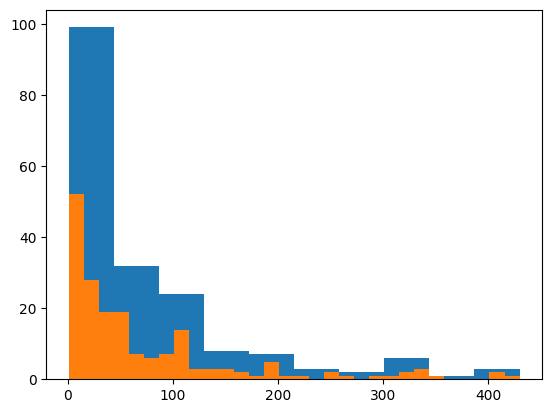

In [47]:
import matplotlib.pyplot as plt

plt.hist(review_strlength_list, bins = 10)
plt.hist(review_strlength_list, bins=30)
plt.show()

- 리뷰글의 길이를 히스토그램으로 만들어 보았다.
- 100자 이내로 쓰인 글이 제일 많았고 200자 이후로 적다.

{'whiskers': [<matplotlib.lines.Line2D at 0x27fa2ef6a10>,
 'caps': [<matplotlib.lines.Line2D at 0x27f9eaea910>,
 'boxes': [<matplotlib.lines.Line2D at 0x27fa2e8dc90>],
 'medians': [<matplotlib.lines.Line2D at 0x27fa2f09690>],
 'fliers': [<matplotlib.lines.Line2D at 0x27fa2f0a210>],
 'means': []}

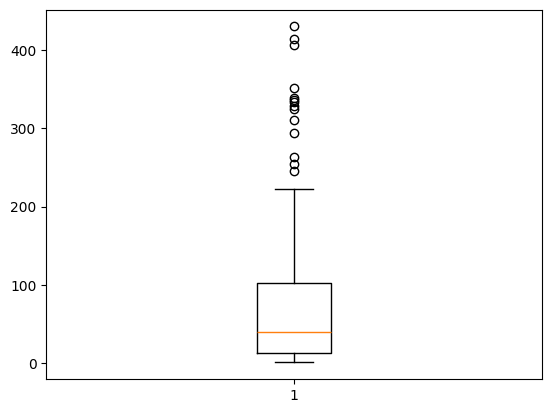

In [48]:
plt.boxplot(review_strlength_list)

#### IQR방법을 이용하여 이상치를 찾기

- [이상치를 찾는 방법 1(IQR)](https://brain-nim.tistory.com/21)
- [이상치를 찾는 방법 2(z-score)](https://velog.io/@jihyunko/%EC%9D%B4%EC%83%81%EC%B9%98-%EC%89%BD%EA%B2%8C-%EC%B2%98%EB%A6%AC%ED%95%98%EA%B8%B0#z-score--z-frac-x_i-mu-sigma_x)

- IQR (Inter-Quartile Range)
- IQR = Q3(3사분위수) - Q1(1사분위수)
- 제거기준 = (Q3 + IQR * 1.5보다 큰 값) &(Q1 - IQR * 1.5보다 작은 값)

In [49]:
asceding_strlength = df_review_strlength.sort_values("리뷰 길이")

In [50]:
Q1 = df_review_strlength["리뷰 길이"].quantile(q=0.25)
Q3 = df_review_strlength["리뷰 길이"].quantile(q=0.75)

print(Q1)
print(Q3)

13.0
102.0


In [51]:
IQR = Q3 - Q1
print(IQR)

89.0


In [52]:
IQR_df = df_review_strlength[(df_review_strlength["리뷰 길이"] >= Q3 + 1.5 * IQR) | (df_review_strlength["리뷰 길이"] <= Q1 - 1.5*IQR)]

In [53]:
print(len(df_original_strlength))
print(len(IQR_df))

185
14


In [54]:
print(type(IQR_df))

<class 'pandas.core.frame.DataFrame'>


In [55]:
print(IQR_df.head())

    리뷰 길이
0     406
8     294
12    245
23    325
31    352


In [56]:
import matplotlib.pyplot as plt
font_path = 'C:/Users/pps/AppData/Local/Microsoft/Windows/Fonts/NanumBarunGothic.ttf'
font_name = plt.matplotlib.font_manager.FontProperties(fname=font_path).get_name()

plt.rcParams['font.family'] = font_name

<Axes: >

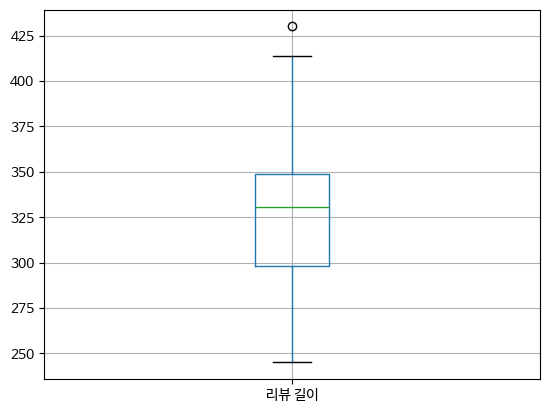

In [57]:
IQR_df.boxplot()

array([[<Axes: title={'center': '리뷰 길이'}>]], dtype=object)

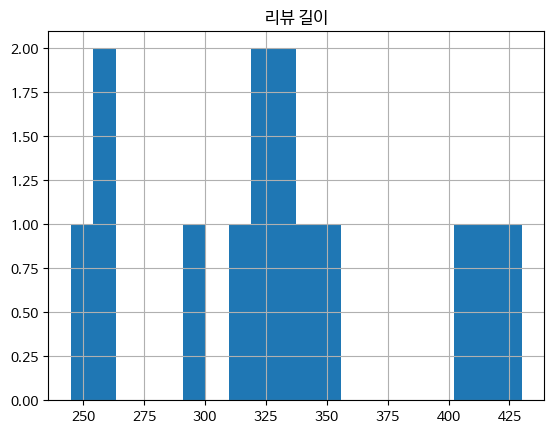

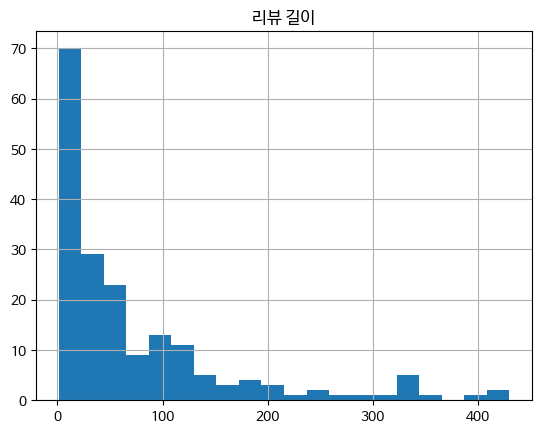

In [58]:
IQR_df.hist(bins=20)
df_review_strlength.hist(bins=20)

In [59]:
print(df_original_strlength.head())

   리뷰 길이
0    406
1    101
2     17
3    171
4    187


In [56]:
df_original_strlength[(abs((df_original_strlength["리뷰 길이"]-df_original_strlength["리뷰 길이"].mean())/df_original_strlength["리뷰 길이"].std())) > 1.96]

,리뷰 길이
0,406
8,294
23,325
31,352
53,430
98,328
103,333
132,255
140,336
152,263


In [60]:
outlier = df_original_strlength[(abs((df_original_strlength["리뷰 길이"]-df_original_strlength["리뷰 길이"].mean())/df_original_strlength["리뷰 길이"].std())) > 1.96].index

In [61]:
clean_df = df_original_strlength.drop(outlier)

In [62]:
clean_df.head()

,리뷰 길이
1,101
2,17
3,171
4,187
5,17


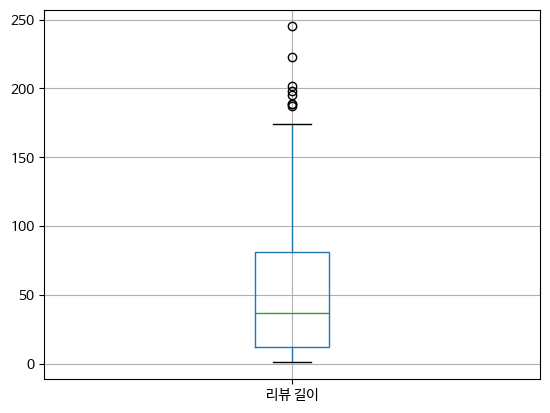

In [61]:
clean_df[["리뷰 길이"]].boxplot()
plt.show()

#### 리뷰의 길이 확인 및 이상치 찾는 함수 정리

In [127]:
import pandas as pd

def find_reviewlength(df_reviews):
    review_strlength = {"리뷰 길이":[]}
    for i in range(len(df_reviews)):
        # 리뷰의 길이를 행마다 구하기
        temp_length = len(df_reviews["Review_Text"][i])
        review_strlength["리뷰 길이"].append(temp_length)
        
    df_temp_review_strlength = pd.DataFrame(review_strlength)
    return df_temp_review_strlength

# z-score를 통해 이상치를 찾는 함수
# def find_outlier(df_length_reviews, df_reviews):
#     outlier = df_length_reviews[(abs((df_length_reviews["리뷰 길이"]-df_length_reviews["리뷰 길이"].mean())/df_length_reviews["리뷰 길이"].std())) > 1.96].index
#     clean_df = df_reviews.drop(outlier)
#     return clean_df

# IQR을 이용한 이상치를 찾는 함수
def find_IQR(df_length_reviews,df_reviews):
    new_df_length = df_length_reviews.copy()
    new_df_reviews = df_reviews.copy()
    Q1 = new_df_length["리뷰 길이"].quantile(q=0.25)
    Q3 = new_df_length["리뷰 길이"].quantile(q=0.75)
    IQR = Q3 - Q1
    # IQR = Q3(3사분위수) - Q1(1사분위수)
    # 제거기준 = (Q3 + IQR * 1.5보다 큰 값) & (Q1 - IQR * 1.5보다 작은 값)
    IQR_df = new_df_length[(new_df_length["리뷰 길이"] >= Q3 + 1.5 * IQR) | (new_df_length["리뷰 길이"] <= Q1 - 1.5*IQR)].index
    print(IQR_df)
    new_df_reviews = new_df_reviews.drop('Unnamed: 0.1', axis = 1)
    new_df_reviews = new_df_reviews.drop('Unnamed: 0', axis = 1)
    
    new_df_reviews.drop(IQR_df, inplace = True)
    print(len(new_df_reviews))
    new_df_reviews.reset_index(drop=True, inplace = True)
    
    new_df_reviews.to_csv("./IQRtest.csv")
    return new_df_reviews
    

In [128]:
temp_reviews_spacing = pd.read_csv("C:/Users/pps/Desktop/Restaurant_Review/Data_Preprocessing/S_hotel_buffet_review_spacingcheck.csv")
df_temp_reviewlength = find_reviewlength(temp_reviews_spacing)
find_IQR(df_temp_reviewlength,temp_reviews_spacing)

Index([0, 8, 12, 23, 31, 53, 98, 103, 132, 140, 152, 169, 174, 175], dtype='int64')
171


,UserID,Review_Text,Date,NumberOfVisit
0,illiiilillil,직원 분들 너무 친절하시고 음식 맛은 대한민국 호텔 뷔페 넘버 원인데 말해 뭐 해입...,2024년 5월 19일 일요일,1번째 방문
1,shooooooo,종류도 알차게 많고 다 맛있어요,2024년 6월 7일 금요일,1번째 방문
2,Choigo다,신라호텔 파크뷰 조식 이용했습니다 11층이라 뷰도 훌륭하고 객실 컨디션이나 청결 서...,2024년 3월 3일 일요일,1번째 방문
3,shekyh,창가 자리는 보기만 하고 부스 좌석 안내받음 안락하고 좋았어요 대게는 차갑고 짜고 ...,2024년 2월 3일 토요일,1번째 방문
4,이진욱쨩,항상 친절하시고 음식도 맛있네요,2024년 4월 21일 일요일,2번째 방문
...,...,...,...,...
166,sj5****,양 갈비가 제일 맛있어요 La갈비 맛있었는데 없어져서 아쉬워요 주말에 1부는 시간이...,2022년 9월 18일 일요일,1번째 방문
167,마츠코,가격 오르고 가성비 떨어진다는 데 처음 와본 사람으로서 이전에 어땠는지 모르겠지만 ...,2022년 8월 24일 수요일,1번째 방문
168,디기디기디기갱갱,가격은 있지만 특별한 날 가기 좋아요 개인적으로 해산물보다는 디저트 육류 순으로 맛...,2022년 10월 10일 월요일,1번째 방문
169,캠퍼필즈,음식이 다양하고 전반적으로 다 맛있어요 무엇보다 다들 친절하고 서비스가 너무 좋아요,2022년 6월 18일 토요일,1번째 방문


---

### 4. 불용어 처리 ❌

### 5. 신조어 처리 ❌

#### `Soynlp` 패키지 사용연습

- 신조어 처리
- ***신조어 처리를 하지 않겠음***

In [133]:
# from soynlp.tokenizer import RegexTokenizer
# tokenizer = RegexTokenizer()
# print(tokenizer.tokenize('체고'))


In [150]:
from konlpy.tag import Okt

okt = Okt()
# okt.pos("저의 최애 메뉴는 짜장면입니다.")
# okt.pos("이영화존잼쓰ㅋㅋㅋㅋ")
okt.pos("좋댓구알")

[('좋', 'Adjective'), ('댓', 'Modifier'), ('구', 'Modifier'), ('알', 'Noun')]

In [136]:
from soynlp.normalizer import emoticon_normalize
print(emoticon_normalize("앜ㅋㅋㅋ이영화존잼쓰ㅠㅠ"))

아ㅋㅋ영화존잼쓰ㅠㅠ


In [ ]:
from soynlp.word import WordExtractor

word_extractor = WordExtractor(
    min_frequency=100,
    min_cohesion_forward=0.05,
    min_right_branching_entropy=0.0
)

---